## Data Loading
### Data Loading은 DataSet과 DataLoader로 이루어져 있음
### 해당 code에서는 DataSet에 관련해서 다룸

In [3]:
import os
import cv2 as cv
import numpy as np
import glob
import torch
from torch.utils import data
from PIL import Image
import matplotlib.pyplot as plt

### dataset은 torch.utils.data.Dataset을 상속받아 구현
### init, len, getitem은 필수적으로 구현
len = 전체 data 수  
getitem = Dataloader에서 Dataset의 getitem을 통해 train image, label 등을 뽑아옴

In [4]:
class DataSet(data.Dataset):
    def __init__(self, data_root, split = 'train'):
        '''
        data_root : root path to data Image ex. cityscapes/ or kitti/ ...
        split : train or validation split directory 
        ex. cityscapes/train cityscapes/val
        '''
        self.root = data_root
        self.split = split
        
        self.image_path = os.path.join(self.root, self.split) #join -> args들이 string으로 들어오면 해당 string을 path 형식으로 바꿔줌
                                                              #join('kitti', 'train') -> kitti/train
        self.files = glob.glob(self.image_path + "/*.png") #glob.glob -> 해당 path에 있는 파일의 정보를 모아둠 !!이미지를 가져오는건 아님!!
        assert len(self.files) is not 0, f'There are no images in path {self.image_path}'
        
        # Augmentation
        self.transform = None
        
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, index): #!반드시 getitem의 args에는 index가 있음 Dataloader에서 알아서 넘기고 getitem 함수를 실행시켜, image, target을 가져옴
        #TODO: Load Image from file list (self.files), Data Augmentation, Label Load
        img, label = self.pull_item(index)
        
        #* Need To  Do Transform To Tensor, Data Augmentation, Convert label to right format
        if self.transform is not None:
            img, label = self.transform(img, label)
            # Tensor 로 변형하는 Augmentation은 필수적으로 진행되야 함
            
        return img, label
    
    def pull_item(self, index):
        img_path = self.files[index]
        gt_path = img_path.replace('train', 'label') #! directory의 구성에 맞춰 target을 불러오기 위한 path
        
        img = Image.open(img_path)
        img = np.asarray(img)
        
        label = Image.open(gt_path)
        label = np.asarray(label)
        
        return img, label

In [5]:
dataset = DataSet(data_root = '../images/kitti_images')

__getitem__ 함수를 직접 불러, image가 나오는지 확인  
실제 Training 시에는 Dataloader가 iter방식으로 getitem을 불러줌

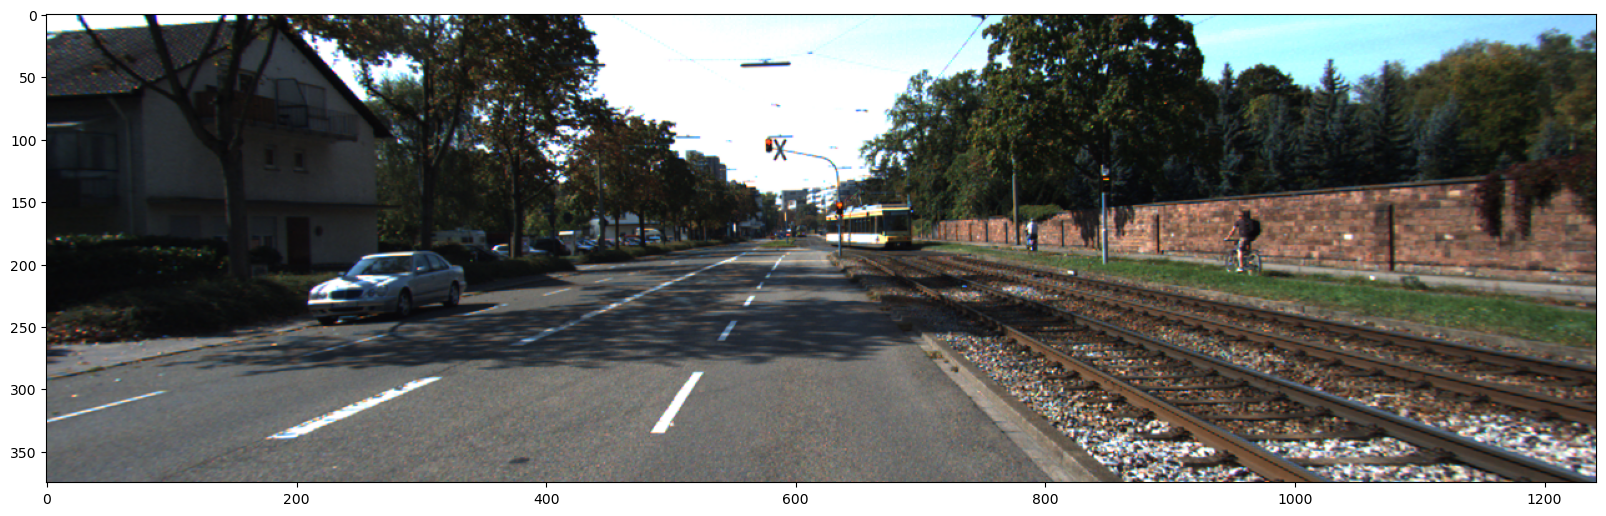

In [6]:
img, label = dataset.__getitem__(0)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

## Data Augmentation
### torch -> Albumentation 알아보기!